# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . ,  Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , ' , m , happy, I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done ,  it , aga , . , . , http://tinyurl.com/lb5p6m
    
    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue, , , Apple , offers , $30 , http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ)

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

Firstly, a note on implementation:

Basic idea is taken from the [tutorial on Hugging face NLP course](https://huggingface.co/learn/nlp-course/en/chapter6/5), reusage of existing code is good practice if understanding the idea behind it

In [5]:
from typing import List

class BPETokenizer:

    def __init__(self, vocab_size: int) -> None:
        """
        Initialization method:

        :vocab_size: is vocabulary size we want to achieve

        vocab is basically current vocabulary,
        merge_table keeps track of the order of the merges we made to extend the vocabulary
        """
        self.vocab_size = vocab_size
        self.vocab = set()
        self.merge_table = {}

    def train(self, corpus: List[str]) -> None:
        """
        Public method to train the tokenizer on the corpus.

        :corpus: the training corpus

        firstly, we fill the vocabulary with all the symbols we have in the corpus
        (not forgetting the EndOfString <EOS>)
        then, we search for most common pairs of tokens from vocab iteratively,
        merging them and putting merged to the merge table and as new token to vocabulary,
        until we reach the desired size of vocabulary
        """
        splits = self.prepare_splits(corpus)
        for seq in corpus:
            for ch in splits[seq]:
                self.vocab.add(ch)
        self.vocab = list(self.vocab)
        while len(self.vocab) < self.vocab_size:
            pairs, splits = self._get_pair_freqs(splits, corpus)
            most_freq_pair = self._get_most_freq_pair(pairs)
            if most_freq_pair is None:
                break
            splits = self._merge_pair(*most_freq_pair, splits, corpus)
            self.merge_table[most_freq_pair] = ''.join(most_freq_pair)
            self.vocab.append(''.join(most_freq_pair))
        return self.vocab, self.merge_table

    def _merge_pair(self, first, second, splits, corpus):
        """
        Private method to merge the pair we found (the most common currently)
        It searches for all the entries of this pair and replaces the pair with one merged token.
        Then it returns splits, which is renewed list of splitted sentences (with new merged tokens).

        :first: is first token in the pair we want to merge
        :second: is second token in the pair we want to merge
        :splits: is list of current splits of the sentences in our training corpus
        :corpus: is our training corpus
        """
        for seq in corpus:
            split = splits[seq]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == first and split[i + 1] == second:
                    split = split[:i] + [first + second] + split[i + 2 :]
                else:
                    i += 1
            splits[seq] = split
        return splits

    def prepare_seq(self, seq):
        """
        auxiliary method to add the special symbol in the beginning of words which are not first in the sentence.
        A good practice to distinguish new sentences and new words in our set

        :seq: is sentence we want to modify
        """
        return ' Ġ'.join(seq.split())

    def prepare_splits(self, corpus):
        """
        prepares a dictionary of splits of the sentences in our corpus.
        adds <EOS> token to the end of each separate sentence.
        returns initial split (one-symbol split)

        :corpus: is training corpus to get splits for
        """
        splits = {seq: [c for c in seq] + ["<EOS>"] for seq in corpus}
        return splits

    def _get_pair_freqs(self, splits, corpus):
        """
        Private method to get frequencies of pairs of tokens in our corpus.
        Used to then determine the most common (frequent) pair of tokens in our splitted sentences.

        :splits: is current state of splitted of (how we currently tokenized) our sentences
        :corpus: is training corpus
        """
        pair_freqs = {}
        for seq in corpus:
            split = splits[seq]
            if len(split) == 1:
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_freqs[pair] = pair_freqs.get(pair, 0) + 1
        return pair_freqs, splits

    def _get_most_freq_pair(self, pairs):
        """
        Auxiliary method to get the most common (frequent) pair of tokens present in the splits.
        Takes
        :pairs: as parameter, which is a dicitonary of {(*pair): frequency} format,
        obtained from _get_pair_freqs
        """
        freq_mx = 0
        pair_mx = None
        for p in pairs:
            f = pairs[p]
            if f > freq_mx:
                freq_mx = f
                pair_mx = p
        return pair_mx

    def tokenize(self, text: str) -> List[str]:
        """
        Public method which takes a string and tokenizes it

        :text: is a single line (string) of text. Can contain several sentences, but must be string.

        returns tokenized text
        """
        split = self.prepare_splits([text])[text]
        for p, merge in self.merge_table.items():
            i = 0
            while i < len(split) - 1:
                if split[i] == p[0] and split[i + 1] == p[1]:
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
        return split


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [8]:
import matplotlib.pyplot as plt

Example: 
New blog post: Bells and whistles, sound the alarm - gut instinct passing through http://bit.ly/UscJR
 
 ['N', 'ew ', 'blo', 'g ', 'po', 'st', ': ', 'B', 'ell', 's and ', 'wh', 'ist', 'l', 'es', ', ', 's', 'oun', 'd the ', 'al', 'ar', 'm ', '- ', 'g', 'ut ', 'inst', 'in', 'c', 't ', 'p', 'ass', 'ing ', 'thr', 'ough', ' http://bit.ly/', 'U', 'sc', 'J', 'R', '\n<EOS>']


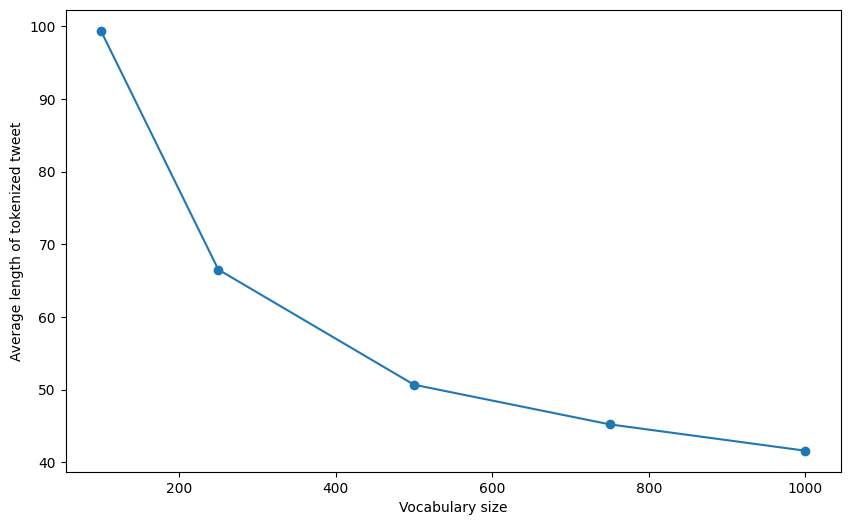

In [11]:
files = ['file1', 'file2', 'file3', 'file4', 'file5']
corpus = []
for fn in files:
    with open(fn) as f:
        corpus.extend(f.readlines())

voc_size = [100, 250, 500, 750, 1000]
mean_length = []
for s in voc_size:
    bpe = BPETokenizer(s)
    v, m = bpe.train(corpus)
    sumlen = 0
    for seq in corpus:
        sumlen += len(bpe.tokenize(seq))
    sumlen /= len(corpus)
    mean_length.append(sumlen)

print(f'Example: \n{corpus[100]} \n {bpe.tokenize(corpus[100])}')
plt.figure(figsize=(10,   6))
plt.plot(voc_size, mean_length, '-o')
plt.xlabel('Vocabulary size')
plt.ylabel('Average length of tokenized tweet')
plt.show()


The vocabulary size has tradeoff of detail understanding over proof for overfitting.

The bigger the vocabulary size, the less tokens on average a sentence has, and more exact details are taken into account (more common sets of symbols). However, the bigger the voc size, the more our tokenizer prone to overfitting on the training dataset, meaning it will be less useful for unknown texts on inference.

However, small vocabulary size may be not that efficient, keeping itself close to just splitting into one-symbol tokens. However, it will require less training time and will be less prone to overfitting, and will only merge most common small sets of tokens or general words (e.g. articles "the", etc.)

Moderate voc size is the best for the beginning, and may be adjusted based on what we want to achieve further with the tokenization schema. In our case, I would personally choose vocab size near to 300-500, since it has quite good efficiency however is most proof against overmemorizing rare constructions (we can see on the graph that going further than 500 achieves less efficient decrease in mean tokenized sequence length)

Thus, let us stick to 500 for our dataset of tweets.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

I have chosen a dataset of deutch dialogues, namely from here: [link](https://github.com/antnbaranov/NLP_Dataset_Germany/tree/main)

But we will use 1/50 of this dataset, since it is 50+MB size (it will be nearly enough to have 1MB of text for this task)

Let us try and see what we can achieve!

In [20]:
from tqdm.notebook import tqdm

  0%|          | 0/4 [00:00<?, ?it/s]

Example: 

 
 ['\n<EOS>']


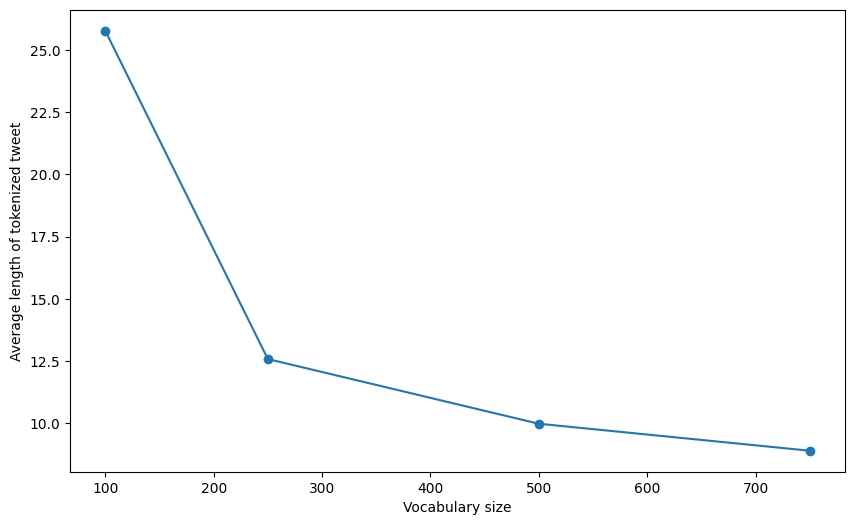

In [23]:
deutch = []
with open('textresult.txt') as f:
    deutch.extend(f.readlines())

deutch = deutch[:len(deutch) // 50]

voc_size = [100, 250, 500, 750]
mean_lengthd = []
for s in tqdm(voc_size):
    bped = BPETokenizer(s)
    v, m = bped.train(deutch)
    sumlen = 0
    for seq in deutch:
        sumlen += len(bped.tokenize(seq))
    sumlen /= len(deutch)
    mean_lengthd.append(sumlen)

print(f'Example: \n{deutch[100]} \n {bped.tokenize(deutch[100])}')
plt.figure(figsize=(10,   6))
plt.plot(voc_size, mean_lengthd, '-o')
plt.xlabel('Vocabulary size')
plt.ylabel('Average length of tokenized tweet')
plt.show()


In [26]:
print(f'Better example: \n{deutch[50]} \n {bped.tokenize(deutch[50])}')

Better example: 
- Verdammter Kagebeshnik!
 
 ['- Ver', 'damm', 'ter ', 'K', 'a', 'geb', 'es', 'h', 'n', 'ik', '!\n<EOS>']


Seems that we will want to stick to a smaller vocab size.

Due to nature of dialogues (short sentences most usually), the average length of one tokenized line is smaller than the tweet's one, however BPE also helps to achieve better tokenization with moderate vocabulary size

This was basically it with BPE tokenizer practice.

### Thanks for attention!